In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import seaborn as sns
from random import sample 

In [2]:
carcass_df = pd.read_csv('DataWithLabels.csv')
carcass_df

,Killnumber,KillDate,AnimalType,Class,Fat,Weight,WeightWarm,ClassificationTime,AgeMonths,Remark,PartCassation,Group
0,21508,2020-11-15,222,6,6,354.555,361.791,2020-11-15 16:20:20.827000000,18,457\n590,NaN,10
1,21508,2021-02-01,216,4,6,249.636,254.701,2021-02-01 13:57:25,17,77\n338\n590\n814,NaN,6
2,21508,2021-04-17,222,8,4,323.338,329.954,2021-04-17 13:40:16.800000000,13,466,NaN,1
3,21508,2021-07-03,216,8,8,322.925,329.540,2021-07-03 16:04:26.010000000,24,339\n387\n588\n703,NaN,3
4,21508,2021-09-05,219,5,7,324.372,330.987,2021-09-05 15:43:20.243000000,17,339\n590,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
74544,21507,2021-04-17,222,8,5,253.254,258.422,2021-04-17 13:39:05.800000000,13,117\n466,NaN,1
74545,21507,2021-11-09,224,7,6,357.553,364.892,2021-11-09 13:41:08.383000000,29,113\n589,NaN,0
74546,21508,2020-03-21,218,3,2,263.798,269.173,2020-03-21 12:00:55,41,77\n338\n589,NaN,5
74547,21508,2020-06-17,216,5,8,238.472,243.330,2020-06-17 13:33:05,25,339\n590,NaN,6


In [3]:
palette = ["#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99", "#fdbf6f", "#ff00ff", "#ff7f00", "#cab2d6", "#6a3d9a", "#ffff99", "#b15928"]

Group
7     10881
3      9870
8      7435
1      6859
6      6499
10     6014
0      5907
5      5700
9      5682
2      5410
4      4292
Name: count, dtype: int64


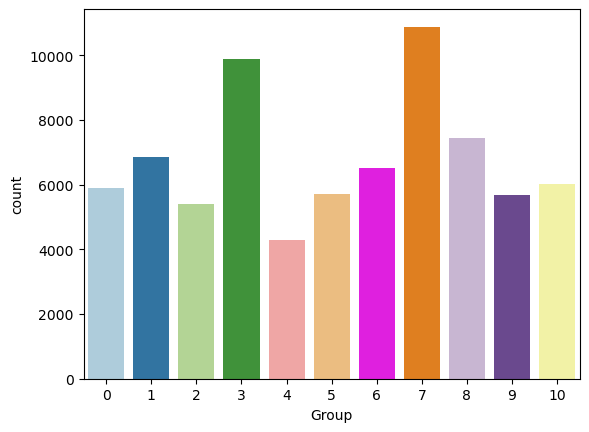

In [4]:
cluster_df = pd.DataFrame(carcass_df['Group'].value_counts())
cluster_bar = sns.barplot(x=cluster_df.index, y=cluster_df['count'], palette=palette)
print(carcass_df['Group'].value_counts())

Method used for undersample data

https://stackoverflow.com/a/70992495

In [5]:
min_group = carcass_df["Group"].value_counts().min()
carcass_df = carcass_df.groupby('Group').apply(
    lambda x: x.sample(n=min(min_group, len(x))))
print(carcass_df['Group'].value_counts())

Group
0     4292
1     4292
2     4292
3     4292
4     4292
5     4292
6     4292
7     4292
8     4292
9     4292
10    4292
Name: count, dtype: int64


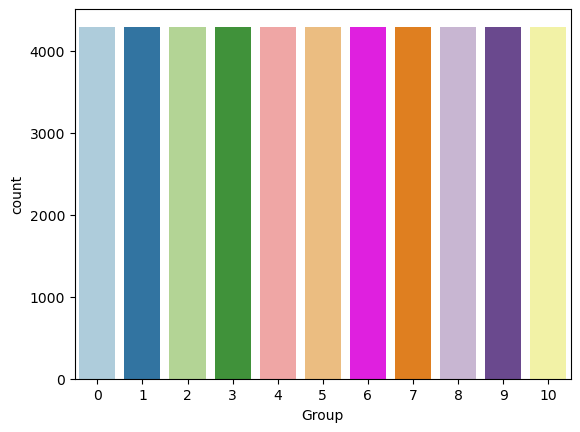

In [6]:
cluster_df = pd.DataFrame(carcass_df['Group'].value_counts())
cluster_bar = sns.barplot(x=cluster_df.index, y=cluster_df['count'], palette=palette)

In [7]:
carcass_df.to_csv('UnderSampledDataSet.csv', index=False)